In [64]:
import pandas as pd             # importing pandas library
import matplotlib.pyplot as plt # importing matplotlib library
from sklearn.model_selection import train_test_split # importing train_test_split
from sklearn.linear_model import LogisticRegression # importing LogisticRegression
from sklearn.metrics import accuracy_score # importing accuracy_score

In [65]:
df = pd.read_csv('Titanic-Dataset.csv' )               # reading the csv file
df.head()                                       # displaying the top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.tail()                       # displaying the last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [67]:
df.shape                    # displaying the number of rows and columns

(891, 12)

In [68]:
df.info()               # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.isnull().sum()                       # checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.dropna(axis=0, inplace=True)          # dropping the null values

In [71]:
df.isnull().sum()                       # checking for null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
duplicate_rows_df = df[df.duplicated()]                 #used to know the duplicate rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [73]:
df = df.drop(['PassengerId', 'Name', 'Ticket','Cabin','Embarked',], axis=1)            #dropping the unnecessary columns
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,female,38.0,1,0,71.2833
3,1,1,female,35.0,1,0,53.1000
6,0,1,male,54.0,0,0,51.8625
10,1,3,female,4.0,1,1,16.7000
11,1,1,female,58.0,0,0,26.5500


In [74]:
# Rename the columns
df = df.rename(columns={
    'Survived': 'Outcome',
    'Pclass': 'Passenger_Class',
    'Age': 'Age',
    'SibSp': '#_Siblings_Spouse',
    'Parch': '#_Parents_Children',
    'Fare': 'Fare_Price'
})

# Display the first 5 rows with the renamed columns
df.head(5)

,Outcome,Passenger_Class,Sex,Age,#_Siblings_Spouse,#_Parents_Children,Fare_Price
1,1,1,female,38.0,1,0,71.2833
3,1,1,female,35.0,1,0,53.1000
6,0,1,male,54.0,0,0,51.8625
10,1,3,female,4.0,1,1,16.7000
11,1,1,female,58.0,0,0,26.5500


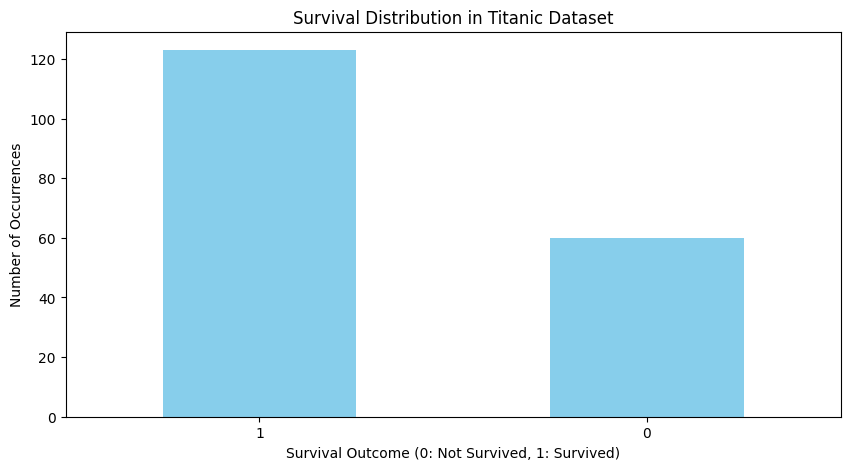

In [75]:
# Bar chart for 'Outcome' column
df['Outcome'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Survival Distribution in Titanic Dataset")
plt.ylabel('Number of Occurrences')
plt.xlabel('Survival Outcome (0: Not Survived, 1: Survived)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

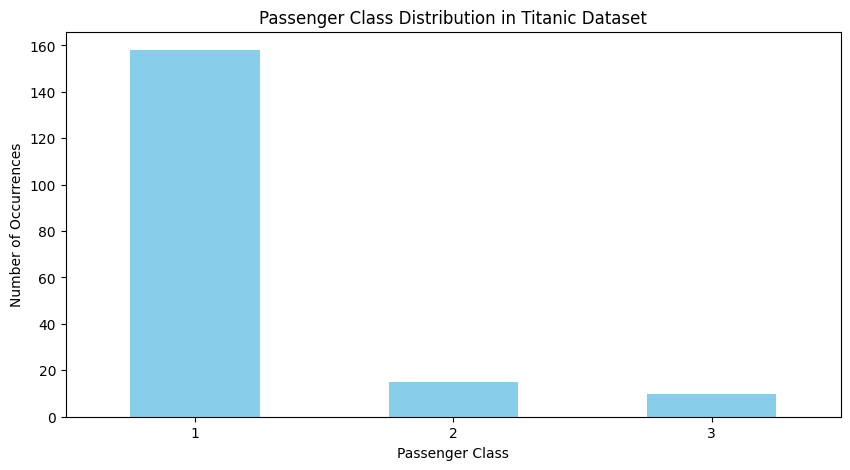

In [76]:
# Bar chart for 'Passenger_Class' column
df['Passenger_Class'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Passenger Class Distribution in Titanic Dataset")
plt.ylabel('Number of Occurrences')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

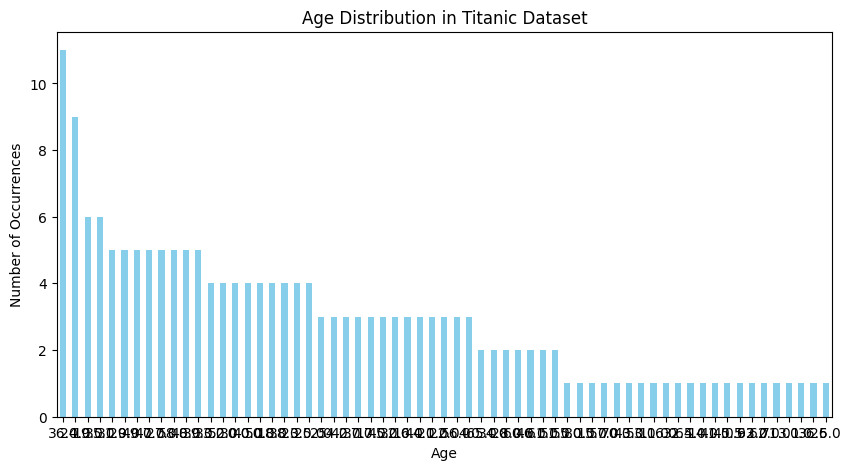

In [77]:
# Bar chart for 'Age' column
df['Age'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Age Distribution in Titanic Dataset")
plt.ylabel('Number of Occurrences')
plt.xlabel('Age')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

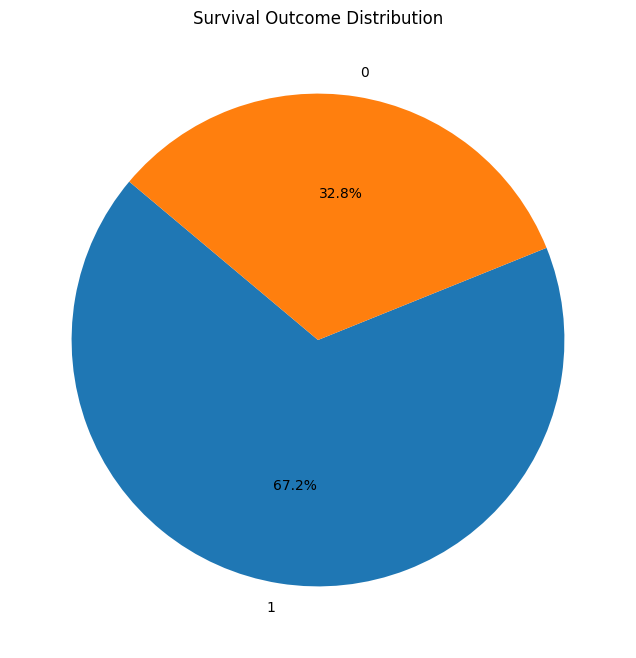

In [78]:
# Count the occurrences of each outcome
outcome_counts = df['Outcome'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Outcome Distribution')
plt.show()

In [79]:
# Convert categorical variables to numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


In [80]:
# Store the feature matrix X and response vector y

x=df.drop('Outcome',axis=1)
y = df['Outcome']

In [81]:
# Splitting the dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [82]:
# Fitting Logistic Regression to the training set

lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [83]:
y_pred1=lr.predict(x_test)   #predicting on test data


In [84]:
print(accuracy_score(y_test,y_pred1))  #checking accuracy


0.7297297297297297
